In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os 

In [1]:
# !wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

/bin/bash: wget: command not found


In [3]:
# !unzip data -d "images/"

Archive:  data.zip
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images

In [7]:
classes=os.listdir("images/Train")
classes

['Pikachu', 'Charmander', 'Bulbasaur']

In [8]:
print("Train Data ")
for folder in classes:
    path="images/Train/"+folder
    length=len(os.listdir(path))
    print(folder,":",length)

Training Data 
Pikachu : 101
Charmander : 102
Bulbasaur : 101


In [9]:
print("Test Data ")
for folder in classes:
    path="images/Test/"+folder
    length=len(os.listdir(path))
    print(folder,":",length)

Test Data 
Pikachu : 40
Charmander : 42
Bulbasaur : 41


### Data Loading

In [11]:
from keras.preprocessing import image

In [12]:
train_data=[] # X
train_labels=[] # Y

In [14]:
for category in classes:
    folder_path=f"images/Train/{category}"
    for img_name in os.listdir(folder_path):
        img_path=f"{folder_path}/{img_name}"
        img=image.load_img(img_path,target_size=(100,100))
        img=image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(train_data),len(train_labels)

(304, 304)

### Data Preprocessing

In [16]:
train_labels=np.array(train_labels)
train_data=np.array(train_data)

In [17]:
train_labels.shape,train_data.shape

((304,), (304, 100, 100, 3))

In [18]:
# convert to (304 , 100 , 100 , 3) => (304 , 30000)
train_data=train_data.reshape((len(train_data),-1))
train_data.shape

(304, 30000)

In [19]:
categoryToLabel={'Pikachu' : 0,'Charmander' : 1,'Bulbasaur' : 2}
labelToCategory={0 : 'Pikachu',1:'Charmander',2:'Bulbasaur'}

In [21]:
train_labels=np.array([categoryToLabel[label] for label in train_labels ])

In [23]:
from keras.utils import to_categorical

In [24]:
# one hot encoding because we have more than 2 classes its a multiclass classification problem
train_labels=to_categorical(train_labels)

In [25]:
train_labels.shape

(304, 3)

In [30]:
train_labels[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Model Architecture

In [31]:
from keras.layers import Dense
from keras.models import Sequential

In [32]:
n_features=train_data.shape[1]

In [34]:
model=Sequential()
model.add(Dense(units=512,activation='relu',input_shape=(n_features,)))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               15360512  
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15533187 (59.25 MB)
Trainable params: 15533187 (59.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(train_data,train_labels,batch_size=32,epochs=50);

Epoch 1/50
10/10 [==============================] - 0s 27ms/step - loss: 3.7164 - accuracy: 0.9704
Epoch 2/50
10/10 [==============================] - 0s 29ms/step - loss: 1.5718 - accuracy: 0.9836
Epoch 3/50
10/10 [==============================] - 0s 29ms/step - loss: 1.6248 - accuracy: 0.9836
Epoch 4/50
10/10 [==============================] - 0s 29ms/step - loss: 0.5972 - accuracy: 0.9967
Epoch 5/50
10/10 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 0s 26ms/step - loss: 7.8978e-05 - accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 0s 27ms/step - loss: 1.9865e-05 - accuracy: 1.0000
Epoch 8/50
10/10 [==============================] - 0s 27ms/step - loss: 1.4561e-06 - accuracy: 1.0000
Epoch 9/50
10/10 [==============================] - 0s 27ms/step - loss: 4.7406e-07 - accuracy: 1.0000
Epoch 10/50
10/10 [==============================] - 0s 26ms/step - loss: 3.5918e-07 - ac

### Test Data 

In [38]:
test_data=[] # X
test_labels=[] # Y

In [39]:
for category in classes:
    folder_path=f"images/Test/{category}"
    for img_name in os.listdir(folder_path):
        img_path=f"{folder_path}/{img_name}"
        img=image.load_img(img_path,target_size=(100,100))
        img=image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

In [40]:
test_labels=np.array(test_labels)
test_data=np.array(test_data)

In [41]:
test_labels.shape,test_data.shape

((123,), (123, 100, 100, 3))

In [42]:
test_labels=np.array([categoryToLabel[label] for label in test_labels ])
test_labels=to_categorical(test_labels)
test_labels.shape

(123, 3)

In [43]:
# convert to (304 , 100 , 100 , 3) => (304 , 30000)
test_data=test_data.reshape((len(test_data),-1))
test_data.shape

(123, 30000)

In [44]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 11ms/step - loss: 7.4177 - accuracy: 0.9756


[7.417714595794678, 0.9756097793579102]

In [45]:
pred=model.predict(test_data).argmax(axis=1)

4/4 [==============================] - 0s 9ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Prediction For 1 Image

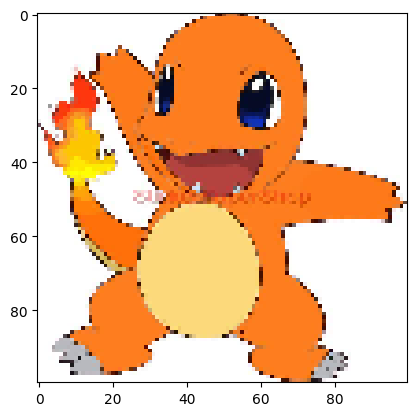

In [65]:
test_image="images/Test/Charmander/2201.jpg"
test_image=image.load_img(test_image,target_size=(100,100))
test_image=image.img_to_array(test_image)
plt.imshow(test_image.astype('int'));

In [66]:
test_image=test_image.reshape((1,-1))
test_image.shape

(1, 30000)

In [67]:
pred=labelToCategory[model.predict(test_image).argmax()]

1/1 [==============================] - 0s 30ms/step


In [68]:
print("Predicted Pokemon is ",pred)

Predicted Pokemon is  Charmander
